## Genetic Algorithm Implementation

Solve a 10-bit binary string optimization problem, in which you need to find the binary string with the largest total bit value.

## Population

In [1]:
import numpy as np

# Set a seed so that the results are consistent over sessions
np.random.seed(3)

In [2]:
def create_binary_population(pop_size, bit_length):
    '''
    Arguments:
    pop_size -- number of individuals inside population
    bit_length -- the number of bits of each individual (e.g. [[1010], [1101]])
    
    Return:
    binary_pop -- population array of shape (pop_size, bit_length)
    '''
    binary_pop = np.random.randint(2, size=(pop_size, bit_length))
    return binary_pop

In [3]:
pop_size, bit_length = 20, 10
binary_population = create_binary_population(pop_size, bit_length)
population_size = len(binary_population)
print("Population:\n", binary_population)

Population:
 [[0 0 1 1 0 0 0 1 1 1]
 [0 1 1 1 0 1 1 0 0 0]
 [0 1 1 0 0 0 1 0 0 0]
 [0 1 0 1 1 0 1 0 0 1]
 [1 0 0 1 0 1 0 1 1 1]
 [1 0 1 0 0 1 1 1 0 0]
 [0 1 0 0 0 1 0 0 1 1]
 [0 0 1 1 1 0 1 1 1 1]
 [1 1 0 1 0 0 1 1 0 1]
 [0 0 0 0 0 1 1 0 1 1]
 [1 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 1 1 1 0 0 1 1 0]
 [0 1 1 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 1 1 1 0 0 1]
 [0 1 0 1 1 0 0 1 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 1]
 [0 1 0 0 0 1 0 1 1 1]]


## Fitness

In [4]:
def fitness_binary_individual(individual):
    '''
    Return:
    fitness -- fitness values, based on number of 1s bits (e.g. [1001] -> 2)
    '''
    return np.sum(individual)

In [5]:
fitness = np.apply_along_axis(fitness_binary_individual, 1, binary_population)

In [6]:
fitness.shape

(20,)

In [7]:
print(f'Population:\n{binary_population}\nFitness:\n{fitness}')

Population:
[[0 0 1 1 0 0 0 1 1 1]
 [0 1 1 1 0 1 1 0 0 0]
 [0 1 1 0 0 0 1 0 0 0]
 [0 1 0 1 1 0 1 0 0 1]
 [1 0 0 1 0 1 0 1 1 1]
 [1 0 1 0 0 1 1 1 0 0]
 [0 1 0 0 0 1 0 0 1 1]
 [0 0 1 1 1 0 1 1 1 1]
 [1 1 0 1 0 0 1 1 0 1]
 [0 0 0 0 0 1 1 0 1 1]
 [1 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 1 1 1 0 0 1 1 0]
 [0 1 1 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 1 1 1 0 0 1]
 [0 1 0 1 1 0 0 1 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 1]
 [0 1 0 0 0 1 0 1 1 1]]
Fitness:
[5 5 3 5 6 5 4 7 6 4 4 1 6 6 2 5 4 5 4 5]


## Selection

Use `Roulette Wheel Selection` to select parents based on their fitness. The probability of selecting an individual is proportional to its fitness.

In [8]:
def rouletter_wheel_selection(population, fitness):
    '''
    Return:
    selected_population -- selected individuals based on fitness
    '''
    # fitness = fitness.ravel()
    fitness_sum = np.sum(fitness)
    if fitness_sum == 0:
        raise ValueError("Total fitness is zero, cannot perform selection.")
    probabilities = fitness / fitness_sum
    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    selected_population = population[selected_indices]
    return selected_population

In [9]:
selected_population = rouletter_wheel_selection(binary_population, fitness)

In [10]:
print(f'Population:\n{binary_population}\nFitness:\n{fitness}\nSelected Population:\n{selected_population}')

Population:
[[0 0 1 1 0 0 0 1 1 1]
 [0 1 1 1 0 1 1 0 0 0]
 [0 1 1 0 0 0 1 0 0 0]
 [0 1 0 1 1 0 1 0 0 1]
 [1 0 0 1 0 1 0 1 1 1]
 [1 0 1 0 0 1 1 1 0 0]
 [0 1 0 0 0 1 0 0 1 1]
 [0 0 1 1 1 0 1 1 1 1]
 [1 1 0 1 0 0 1 1 0 1]
 [0 0 0 0 0 1 1 0 1 1]
 [1 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 1 1 1 0 0 1 1 0]
 [0 1 1 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 1 1 1 0 0 1]
 [0 1 0 1 1 0 0 1 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 1]
 [0 1 0 0 0 1 0 1 1 1]]
Fitness:
[5 5 3 5 6 5 4 7 6 4 4 1 6 6 2 5 4 5 4 5]
Selected Population:
[[0 1 0 1 1 0 1 0 0 1]
 [0 1 1 1 1 0 0 1 1 0]
 [0 0 1 0 1 1 1 0 0 1]
 [0 1 0 0 0 1 0 1 1 1]
 [1 1 1 1 1 0 0 0 0 0]
 [1 0 0 1 1 0 1 0 0 0]
 [0 1 1 1 0 1 1 0 0 0]
 [1 1 0 1 0 0 1 1 0 1]
 [1 1 1 0 0 0 0 0 0 1]
 [0 0 1 0 1 1 1 0 0 1]
 [1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 0 1 1 0 1]
 [1 0 0 1 0 1 0 1 1 1]
 [0 1 0 1 1 0 1 0 0 1]
 [0 1 1 1 0 1 1 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [0 1 1 1 1 0 0 1 1 0]
 [0 1 0 1 1 0 1 0 0 1]
 [0 0 1 1 1 0 1 1 1 1]
 [0 0 1 1 0 0 0 1 

## Crossover

In [11]:
def one_point_crossover(parent1, parent2):
    '''
    Perform one-point crossover between two parents.
    
    Arguments:
    parent1 -- first parent binary array
    parent2 -- second parent binary array
    
    Return:
    child1 -- first child binary array
    child2 -- second child binary array
    '''
    point = np.random.randint(1, len(parent1)) # random integer from low(inclusive) to high(exclusive)
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

In [12]:
parent_idx = np.array(np.random.choice(population_size, 2, replace=False))
parent1, parent2 = selected_population[parent_idx]
child1, child2 = one_point_crossover(parent1, parent2)

In [13]:
print(f'Parent 1: {parent1}\nParent 2: {parent2}\nChild 1: {child1}\nChild 2: {child2}')

Parent 1: [0 1 1 1 1 0 0 1 1 0]
Parent 2: [0 1 0 0 0 1 0 1 1 1]
Child 1: [0 1 1 1 0 1 0 1 1 1]
Child 2: [0 1 0 0 1 0 0 1 1 0]


## Mutation

In [14]:
def bit_flip_mutation(individual, mutation_rate):
    random_probs = np.random.random(individual.shape)
    return np.where(random_probs < mutation_rate, 1-individual, individual)

In [15]:
mutation_rate = 0.9

# child 1 mutation
child1_mutation = bit_flip_mutation(child1, mutation_rate)
# print(f'Random Probs used to mutate child: {random_probs}')
print(f'Child1: {child1}\nChild1 Mutation: {child1_mutation}')

Child1: [0 1 1 1 0 1 0 1 1 1]
Child1 Mutation: [1 0 0 0 1 0 1 0 0 0]


## Replacement and Termination

In [16]:
import numpy as np

# Set a seed so that the results are consistent over sessions
np.random.seed(3)

def create_binary_population(pop_size, bit_length):
    '''
    Arguments:
    pop_size -- number of individuals inside population
    bit_length -- the number of bits of each individual (e.g. [[1010], [1101]])
    
    Return:
    binary_pop -- population array of shape (pop_size, bit_length)
    '''
    binary_pop = np.random.randint(2, size=(pop_size, bit_length))
    return binary_pop

def fitness_binary_individual(individual):
    '''
    Return:
    fitness -- fitness values, based on number of 1s bits (e.g. [1001] -> 2)
    '''
    return np.sum(individual)

def rouletter_wheel_selection(population, fitness):
    '''
    Return:
    selected_population -- selected individuals based on fitness
    '''
    # fitness = fitness.ravel()
    fitness_sum = np.sum(fitness)
    if fitness_sum == 0:
        raise ValueError("Total fitness is zero, cannot perform selection.")
    probabilities = fitness / fitness_sum
    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    selected_population = population[selected_indices]
    return selected_population

def one_point_crossover(parent1, parent2):
    '''
    Perform one-point crossover between two parents.
    
    Arguments:
    parent1 -- first parent binary array
    parent2 -- second parent binary array
    
    Return:
    child1 -- first child binary array
    child2 -- second child binary array
    '''
    point = np.random.randint(1, len(parent1)) # random integer from low(inclusive) to high(exclusive)
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

def bit_flip_mutation(individual, mutation_rate):
    random_probs = np.random.random(individual.shape)
    return np.where(random_probs < mutation_rate, 1-individual, individual)

In [21]:
population_size = 20
bit_length = 20
n_generations = 70
mutation_rate = 0.01

fitnesses = []

population = create_binary_population(population_size, bit_length)

In [22]:
for i in range(n_generations):
    fitness_values = np.apply_along_axis(fitness_binary_individual, 1, population)
    fitnesses.append(np.max(fitness_values))
    print(f'Best: {fitnesses[-1]}')
    
    selected_population = rouletter_wheel_selection(population, fitness_values)
    new_population = []
    
    while(len(new_population) < population_size):
        # Selection
        # Randomly choose 2 individuals from selected population
        parent_idx = np.array(np.random.choice(population_size, 2, replace=False))
        parent1, parent2 = selected_population[parent_idx]
        
        # Crossover
        child1, child2 = one_point_crossover(parent1, parent2)
        
        # Mutation
        child1_mutation = bit_flip_mutation(child1, mutation_rate)
        child2_mutation = bit_flip_mutation(child2, mutation_rate)
        
        # Add children to new population
        new_population.append(child1_mutation)
        new_population.append(child2_mutation)
        
    population = np.array(new_population[:population_size])

Best: 13
Best: 16
Best: 15
Best: 15
Best: 16
Best: 16
Best: 16
Best: 17
Best: 16
Best: 17
Best: 16
Best: 17
Best: 16
Best: 15
Best: 15
Best: 15
Best: 15
Best: 15
Best: 15
Best: 16
Best: 17
Best: 16
Best: 17
Best: 17
Best: 16
Best: 16
Best: 16
Best: 16
Best: 16
Best: 17
Best: 17
Best: 17
Best: 18
Best: 17
Best: 17
Best: 17
Best: 17
Best: 17
Best: 17
Best: 18
Best: 17
Best: 17
Best: 18
Best: 18
Best: 18
Best: 18
Best: 18
Best: 18
Best: 19
Best: 17
Best: 18
Best: 18
Best: 17
Best: 17
Best: 17
Best: 17
Best: 18
Best: 16
Best: 17
Best: 16
Best: 17
Best: 17
Best: 17
Best: 16
Best: 16
Best: 16
Best: 16
Best: 15
Best: 16
Best: 16


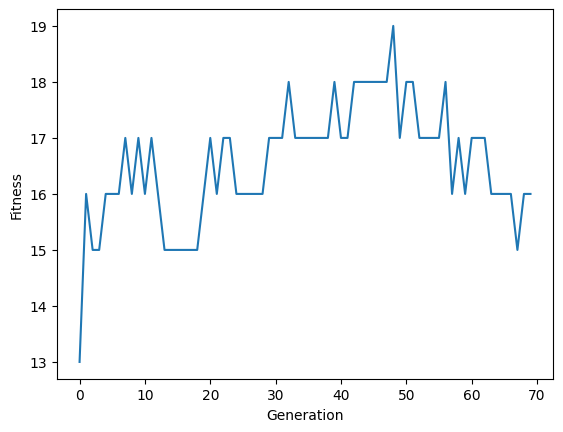

In [23]:
import matplotlib.pyplot as plt

plt.plot(fitnesses)
plt.xlabel('Generation')
plt.ylabel('Fitness');